![](images/68_95_99_rule.png)

The normal distribution is commonly associated with the normal distribution with the 68-95-99.7 rule which you can see in the image above. 68% of the data is within 1 standard deviation (σ) of the mean (μ), 95% of the data is within 2 standard deviations (σ) of the mean (μ), and 99.7% of the data is within 3 standard deviations (σ) of the mean (μ).

This notebook explains how those numbers were derived in the hope that they can be more interpretable for your future endeavors.

## Probability Density Function

To be able to understand where the percentages come from in the 68-95-99.7 rule, it is important to know about the probability density function (PDF). A PDF is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value. This probability is given by the integral of this variable’s PDF over that range — that is, it is given by the area under the density function but above the horizontal axis and between the lowest and greatest values of the range. This definition might not make much sense so let’s clear it up by graphing the probability density function for a normal distribution. The equation below is the probability density function for a normal distribution

![](images/probabilityDensityFunctionNormalDistribution.png)

Let’s simplify it by assuming we have a mean (μ) of 0 and a standard deviation (σ) of 1.

![](images/pdfNormal_mean0_std_1.png)

Now that the function is simpler, let’s graph this function with a range from -3 to 3.

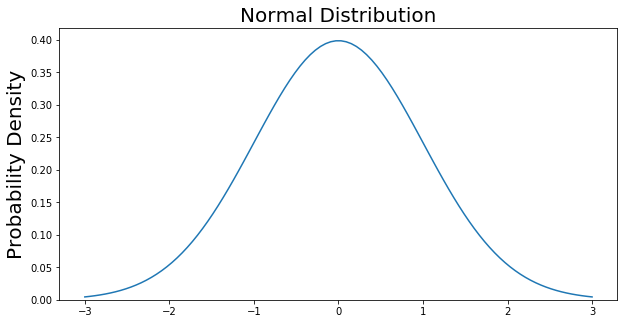

In [61]:
# Import all libraries for the rest of the blog post
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-3, 3, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20);

The graph above does not show you the probability of events but their probability density. To get the probability of an event within a given range we will need to integrate. Suppose we are interested in finding the probability of a random data point landing within 1 standard deviation of the mean, we need to integrate from -1 to 1. This can be done with SciPy.

## Within 1 Standard Deviation

<b>Math Expression</b> $$\int_{-1}^{1}\frac{1}{\sqrt{2\pi}}e^{-x^{2}/2}\mathrm{d}x$$

In [83]:
# Make a PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

# Integrate PDF from -1 to 1
result_n1_1, _ = quad(normalProbabilityDensity, -1, 1, limit = 1000)
print(result_n1_1)

0.682689492137086


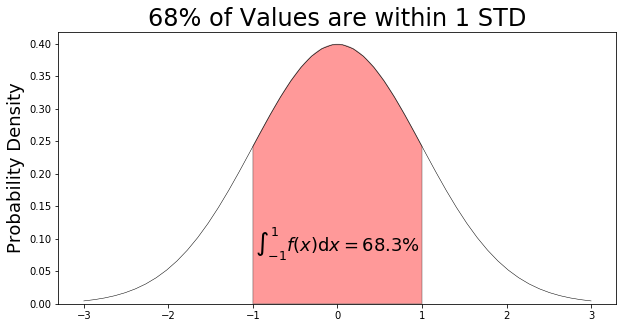

In [84]:
a, b = -1, 1 # integral limits

x = np.linspace(-3, 3)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0, .08, r"$\int_{-1}^{1} f(x)\mathrm{d}x = $" + "{0:.1f}%".format(result_n1_1*100),
         horizontalalignment='center', fontsize=18);

ax.set_title(r'68% of Values are within 1 STD', fontsize = 24);
ax.set_ylabel(r'Probability Density', fontsize = 18);

fig.savefig('images/68_1_std.png', dpi = 1200)

68% of the data is within 1 standard deviation (σ) of the mean (μ).

## Within 2 Standard Deviations

<b>Math Expression</b> $$\int_{-2}^{2}\frac{1}{\sqrt{2\pi}}e^{-x^{2}/2}\mathrm{d}x$$

In [85]:
# Make the PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

# Integrate PDF from -2 to 2
result_n2_2, _ = quad(normalProbabilityDensity, -2, 2, limit = 1000)
print(result_n2_2)

0.9544997361036417


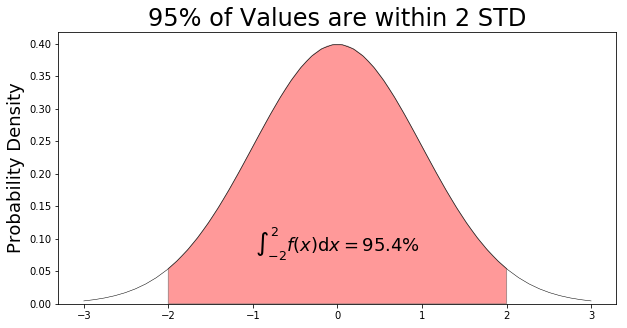

In [86]:
a, b = -2, 2 # integral limits

x = np.linspace(-3, 3)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0, .08, r"$\int_{-2}^{2} f(x)\mathrm{d}x = $" + "{0:.1f}%".format(result_n2_2*100),
         horizontalalignment='center', fontsize=18);

ax.set_title(r'95% of Values are within 2 STD', fontsize = 24);
ax.set_ylabel(r'Probability Density', fontsize = 18);

fig.savefig('images/95_2_std.png', dpi = 1200)

95% of the data is within 2 standard deviations (σ) of the mean (μ).

## Within 3 Standard Deviations

<b>Math Expression</b> $$\int_{-3}^{3}\frac{1}{\sqrt{2\pi}}e^{-x^{2}/2}\mathrm{d}x$$

In [87]:
# Make the PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

# Integrate PDF from -3 to 3
result_n3_3, _ = quad(normalProbabilityDensity, -3, 3, limit = 1000)
print(result_n3_3)

0.9973002039367399


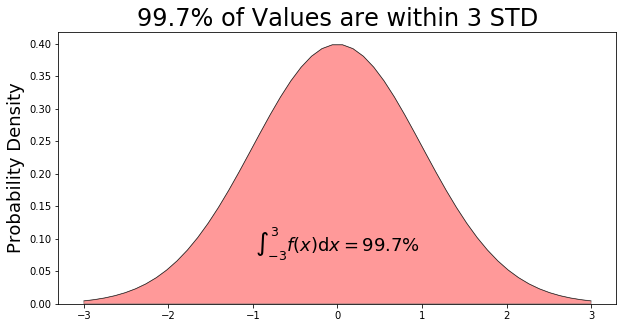

In [88]:
a, b = -3, 3 # integral limits

x = np.linspace(-3, 3)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0, .08, r"$\int_{-3}^{3} f(x)\mathrm{d}x = $" + "{0:.1f}%".format(result_n3_3*100),
         horizontalalignment='center', fontsize=18);

ax.set_title(r'99.7% of Values are within 3 STD', fontsize = 24);
ax.set_ylabel(r'Probability Density', fontsize = 18);

fig.savefig('images/99_3_std.png', dpi = 1200)

99.7% of the data is within 3 standard deviations (σ) of the mean (μ).

## Negative Infinity to Positive Infinity

For any PDF, the area under the curve must be 1 (the probability of drawing any number from the function's range is always 1).

In [89]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

result_all, _ = quad(normalProbabilityDensity, np.NINF, np.inf)
print(result_all)

0.9999999999999997


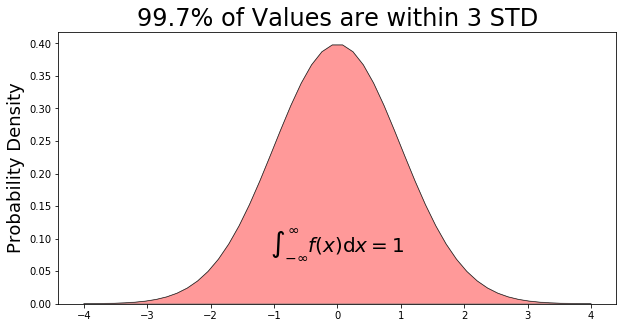

In [90]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 4 std deviations 
a, b = -4, 4 # integral limits

x = np.linspace(a, b)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0, .08, r"$\int_{-\infty}^{\infty} f(x)\mathrm{d}x = 1$",
         horizontalalignment='center', fontsize=20);

ax.set_title(r'99.7% of Values are within 3 STD', fontsize = 24);
ax.set_ylabel(r'Probability Density', fontsize = 18);

<b>You will also find that it is also possible for observations to fall 4, 5 or even more standard deviations from the mean, but this is very rare if you have a normal or nearly normal distribution.</b>

## 68-95-99.7 Rule

Most of the code below is just matplotlib. It is a bit difficult to understand, but I figured somebody would appreciate the code for their endeavors. 

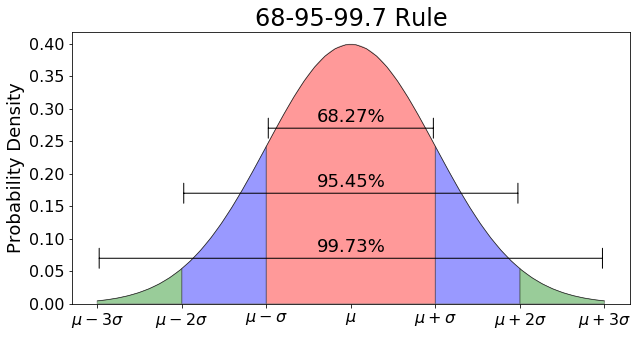

In [94]:
x = np.linspace(-3, 3)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

#############################
a, b = -1, 1 # integral limits

# Make the shaded region
ix = np.linspace(-1, 1)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0.0, .28, r'{0:.2f}%'.format((result_n1_1)*100),
         horizontalalignment='center', fontsize=18);

##############################
# Bounding the make arrow 
ax.annotate(r'',
            xy=(-1, .27), xycoords='data',
            xytext=(1, .27), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

##############################
a, b = 1, 2 # integral limits

# Make the shaded region
ix = np.linspace(1, 2)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='blue', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

##############################
a, b = -2, -1 # integral limits

# Make the shaded region
ix = np.linspace(-2, -1)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='blue', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

#ax.text(-1.5, .04, r'{0:.2f}%'.format(result_n2_n1*100),
#         horizontalalignment='center', fontsize=14);

ax.text(0.0, .18, r'{0:.2f}%'.format((result_n2_2)*100),
         horizontalalignment='center', fontsize=18);

##############################
# Bounding the make arrow 
ax.annotate(r'',
            xy=(-2, .17), xycoords='data',
            xytext=(2, .17), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

##############################
a, b = 2, 3 # integral limits

# Make the shaded region
ix = np.linspace(2, 3)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

##############################
a, b = -3, -2 # integral limits

# Make the shaded region
ix = np.linspace(-3, -2)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

### This is the middle part
ax.text(0.0, .08, r'{0:.2f}%'.format((result_n3_3)*100),
         horizontalalignment='center', fontsize=18);

# Bounding the make arrow 
ax.annotate(r'',
            xy=(-3, .07), xycoords='data',
            xytext=(3, .07), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

ax.set_title(r'68-95-99.7 Rule', fontsize = 24)
ax.set_ylabel(r'Probability Density', fontsize = 18)

xTickLabels = ['',
               r'$\mu - 3\sigma$',
               r'$\mu - 2\sigma$',
               r'$\mu - \sigma$',
               r'$\mu$',
               r'$\mu + \sigma$',
               r'$\mu + 2\sigma$',
               r'$\mu + 3\sigma$']

yTickLabels = ['0.00',
               '0.05',
               '0.10',
               '0.15',
               '0.20',
               '0.25',
               '0.30',
               '0.35',
               '0.40']

ax.set_xticklabels(xTickLabels, fontsize = 16)

ax.set_yticklabels(yTickLabels, fontsize = 16)

fig.savefig('images/68_95_99_rule.png', dpi = 1200)

# Code to look at Different Regions

## Mean (0) to Mean + STD (1)

In [95]:
# Integrate normal distribution from 0 to 1
result, error = quad(normalProbabilityDensity, 0, 1, limit = 1000)

In [96]:
result

0.341344746068543

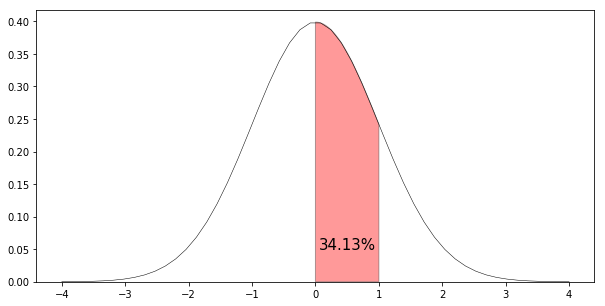

In [97]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 5 std deviations 
a, b = 0, 1 # integral limits

x = np.linspace(-4, 4)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(0, 1)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0.5, .05, r'{0:.2f}%'.format(result*100),
         horizontalalignment='center', fontsize=15);

## Looking at Between 1 STD

In [98]:
result, _ = quad(normalProbabilityDensity, -1, 1)

In [99]:
result

0.682689492137086

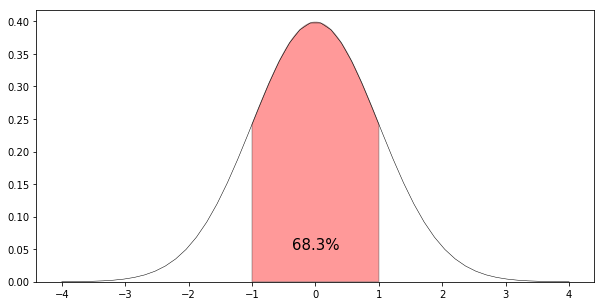

In [100]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 5 std deviations 
a, b = -1, 1 # integral limits

x = np.linspace(-4, 4)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(-1, 1)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0.0, .05, r'{0:.1f}%'.format(result*100),
         horizontalalignment='center', fontsize=15);

## (Mean + STD) to Mean + (2STD)

In [101]:
result, error = quad(normalProbabilityDensity, 1, 2, limit = 1000)

In [102]:
result

0.13590512198327784

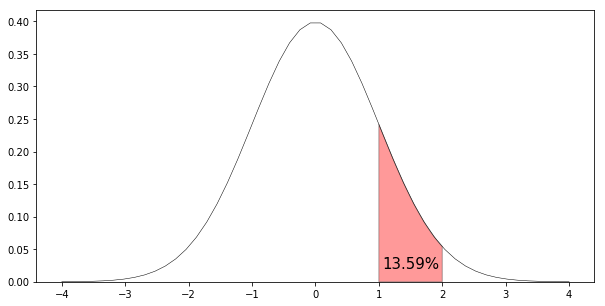

In [103]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 5 std deviations 
a, b = 1, 2 # integral limits

x = np.linspace(-4, 4)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(1.5, .02, r'{0:.2f}%'.format(result*100),
         horizontalalignment='center', fontsize=15);

## (Mean + 2STD) to (Mean + 3STD)

In [104]:
result, error = quad(normalProbabilityDensity, 2, 3, limit = 1000)

In [105]:
result

0.02140023391654912

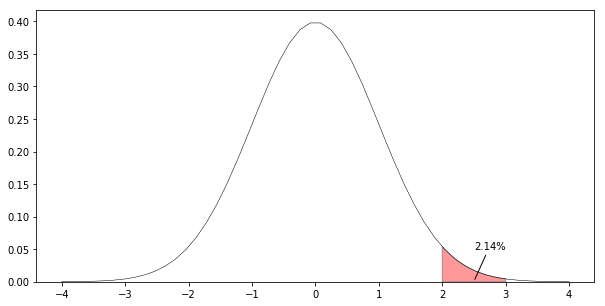

In [106]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 5 std deviations 
a, b = 2, 3 # integral limits

x = np.linspace(-4, 4)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

#ax.text(1.5, .02, r'{0:.1f}%'.format(result*100),
#         horizontalalignment='center', fontsize=15);

ax.annotate(r'{0:.2f}%'.format(result*100),
            xy=(2.5, 0.001), xycoords='data',
            xytext=(2.5, 0.05), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3"),
            );

## (Mean + 3STD) to (Mean + 4STD)

In [107]:
result, error = quad(normalProbabilityDensity, 3, 4, limit = 1000)

In [108]:
result

0.0013182267897969746

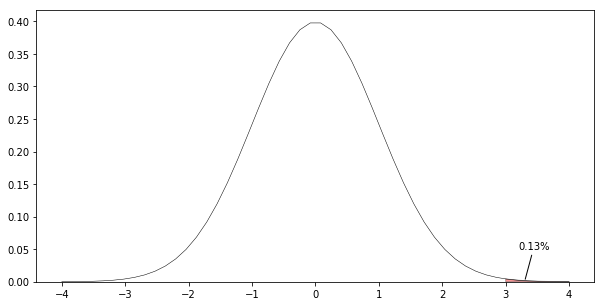

In [109]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 5 std deviations 
a, b = 3, 4 # integral limits

x = np.linspace(-4, 4)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.annotate(r'{0:.2f}%'.format(result*100),
            xy=(3.3, 0.001), xycoords='data',
            xytext=(3.2, 0.05), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3"),
            );

## Mean + 4STD (4) to Infinity

This is the area under the curve that wont fit in my picture. Notice the probability is so small

In [110]:
result, error = quad(normalProbabilityDensity, 4, np.inf, limit = 1000)

In [111]:
result

3.1671241830206856e-05

## Lets put together the Entire Graph

If you think this is too much code, next section will make this better. 

In [112]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

In [113]:
# Area under curve for entire Graph
result, _ = quad(normalProbabilityDensity, np.NINF, np.inf)

# Integrate normal distribution from 0 to 1
result_0_1, _ = quad(normalProbabilityDensity, 0, 1, limit = 1000)

# Integrate normal distribution from -1 to 0
result_n1_0, _ = quad(normalProbabilityDensity, -1, 0, limit = 1000)

# Integrate normal distribution from 1 to 2
result_1_2, _ = quad(normalProbabilityDensity, 1, 2, limit = 1000)

# Integrate normal distribution from -2 to -1
result_n2_n1, _ = quad(normalProbabilityDensity, -2, -1, limit = 1000)

# Integrate normal distribution from 2 to 3
result_2_3, _ = quad(normalProbabilityDensity, 2, 3, limit = 1000)

# Integrate normal distribution from -3 to -2
result_n3_n2, _ = quad(normalProbabilityDensity, -3, -2, limit = 1000)

# Integrate normal distribution from 3 to 4
result_3_4, _ = quad(normalProbabilityDensity, 3, 4, limit = 1000)

# Integrate normal distribution from -4 to -3
result_n4_n3, _ = quad(normalProbabilityDensity, -4, -3, limit = 1000)

# Integrate normal distribution from 4 to inf
result_4_inf, error = quad(normalProbabilityDensity, 4, np.inf, limit = 1000)

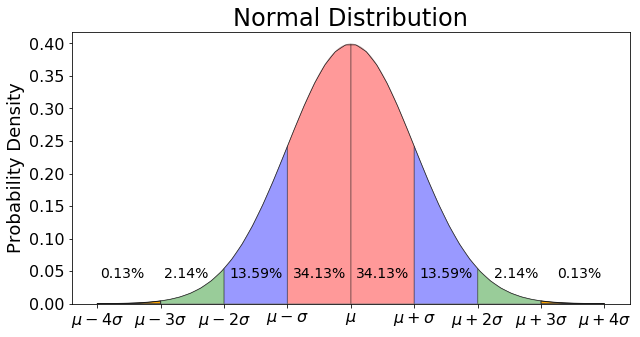

In [114]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 5 std deviations 

x = np.linspace(-4, 4)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

#############################
a, b = 0, 1 # integral limits

# Make the shaded region
ix = np.linspace(0, 1)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0.5, .04, r'{0:.2f}%'.format(result_0_1*100),
         horizontalalignment='center', fontsize=14);

##############################
a, b = -1, 0 # integral limits

# Make the shaded region
ix = np.linspace(-1, 0)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(-0.5, .04, r'{0:.2f}%'.format(result_n1_0*100),
         horizontalalignment='center', fontsize=14);

##############################
a, b = 1, 2 # integral limits

# Make the shaded region
ix = np.linspace(1, 2)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='blue', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(1.5, .04, r'{0:.2f}%'.format(result_1_2*100),
         horizontalalignment='center', fontsize=14);

##############################
a, b = -2, -1 # integral limits

# Make the shaded region
ix = np.linspace(-2, -1)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='blue', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(-1.5, .04, r'{0:.2f}%'.format(result_n2_n1*100),
         horizontalalignment='center', fontsize=14);

##############################
a, b = 2, 3 # integral limits

# Make the shaded region
ix = np.linspace(2, 3)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(2.6, .04, r'{0:.2f}%'.format(result_2_3*100),
         horizontalalignment='center', fontsize=14);


##############################
a, b = -3, -2 # integral limits

# Make the shaded region
ix = np.linspace(-3, -2)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(-2.6, .04, r'{0:.2f}%'.format(result_2_3*100),
         horizontalalignment='center', fontsize=14);

##############################
a, b = 3, 4 # integral limits

# Region from 3 to 4
ix = np.linspace(3, 4)
iy = normalProbabilityDensity(ix)
verts = [(3, 0)] + list(zip(ix, iy)) + [(4, 0)]
poly = Polygon(verts, facecolor='orange', edgecolor='.2', alpha = 1)
ax.add_patch(poly);

ax.text(3.6, .04, r'{0:.2f}%'.format(result_3_4*100),
         horizontalalignment='center', fontsize=14);

# Region from -4 to -3
ix = np.linspace(-4, -3)
iy = normalProbabilityDensity(ix)
verts = [(-4, 0)] + list(zip(ix, iy)) + [(-3, 0)]
poly = Polygon(verts, facecolor='orange', edgecolor='.2', alpha = 1)
ax.add_patch(poly);

ax.text(-3.6, .040, r'{0:.2f}%'.format(result_n4_n3*100),
         horizontalalignment='center', fontsize=14);

ax.set_title(r'Normal Distribution', fontsize = 24)
ax.set_ylabel(r'Probability Density', fontsize = 18)

xTickLabels = ['',
               r'$\mu - 4\sigma$',
               r'$\mu - 3\sigma$',
               r'$\mu - 2\sigma$',
               r'$\mu - \sigma$',
               r'$\mu$',
               r'$\mu + \sigma$',
               r'$\mu + 2\sigma$',
               r'$\mu + 3\sigma$',
               r'$\mu + 4\sigma$']

yTickLabels = ['0.00',
               '0.05',
               '0.10',
               '0.15',
               '0.20',
               '0.25',
               '0.30',
               '0.35',
               '0.40']

ax.set_xticklabels(xTickLabels, fontsize = 16)

ax.set_yticklabels(yTickLabels, fontsize = 16)

fig.savefig('images/NormalDistribution.png', dpi = 1200)